# Train Your Own GPT Model

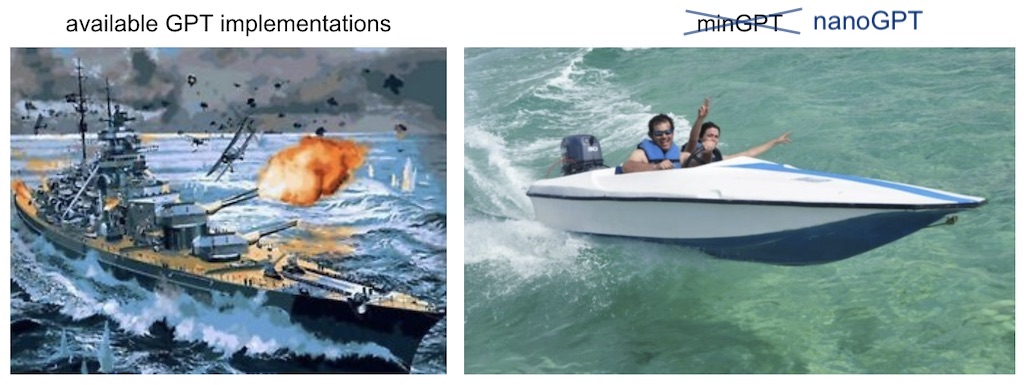

## Introduction 

We will try out the open-source nanoGPT package found at 

> [github.com/karpathy/nanoGPT](https://github.com/karpathy/nanoGPT)
   
but with this code slightly modified for this workshop.

And for the SWMAL course: see _Q_ questions at the end of the notebook.

### Objective

The objective is, within an open-source framework, to 

* __train__ a _small_&nbsp; large-language model (LLM) with a given text-based dataset,

* make some __predictions__ using the trained model, 

* __tune__ various settings in training and prediction, like prompting and temperature, 

* and, finally, to train a model on your very __own text dataset__. 

So, explaining the inner workings of an ML text transformer model[1], here a Generative-Pretrained Transformer[2], is not an objective. 

All files and data are placed on a local server, and you just need a web-browser to get started.

[1]: Transformer and attention model reference see [Attention Is All You Need](https://arxiv.org/abs/1706.03762).

[2]: GPT-2 code and references, see [Github: openai / gpt-2](https://github.com/openai/gpt-2).

### Abbreviations

* __AI__: Artificial Intelligence, but I found no good formal definition. The [EU AI definition](https://www.artificial-intelligence-act.com/) is given below (but reading it carefully it might also be the definition of _software_ in general?):

> _"Artificial intelligence system’ (AI system) means a system that is designed to operate with a certain level of autonomy and that, based on machine and/or human-provided data and inputs, infers how to achieve a given set of human-defined objectives using machine learning and/or logic- and knowledge based approaches, and produces system-generated outputs such as content (generative AI systems), predictions, recommendations or decisions , influencing the environments with which the AI system interacts."_

* __ECE__: Department of Electrical and Computer Engineering, my _home-sweet-home_!
* __GPT__: [Generative Pre-trained Transformer](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer).
* __GPU__: Graphical Processing Unit, or a gaming card for short. Can do massive parallel computations needed for ML training. The GPU is typically a factor of 10 to 20 faster than a traditional CPU doing ML training. Sometimes also known as a GP-GPU, that is a _General Purpose_ GPU.
* __HCA__: [Hans Chrisitan Andersen](https://en.wikipedia.org/wiki/Hans_Christian_Andersen), Danish poet.
* __HPC__: High Performance Computing, aka a cluster-compute system, capable of doing computation in parallel on many servers.
* __IPYNB__: Suffix used for IPython Jupyter NoteBooks. Jupyter is an anagram of Julia, Python, and R. 
* __LLM__: [large language model](https://en.wikipedia.org/wiki/Large_language_model).
* __ML__: Machine Learning, with [Tom Mitchell](https://en.wikipedia.org/wiki/Tom_M._Mitchell)'s definition:

>_“A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.”_
 
* __NN__: Neural Network, normally a pure feed-forward network, can be used as a general function approximator.
* __RNN__: Recurrent Neural Network, a text processing network, that has 'feedback' via recursion.

# Setup, Train, Predict, Tune---Repeat    

We will run all the training and prediction on our local hardware, so no setup is needed on your own PC [3]. 

The file you are currently viewing is a _JupyterLab Notebook_, or just Notebook for short in the proceeding.

The how-to sequence for doing this, running stuff on a remote HPC system, is given in the sequence of steps below, so please follow them...

### For the Impatient Hacker

Just try it out following these steps. If a how-to step is not working for you, jump to the more elaborate description in the section below---perhaps this documentation will give you a cue of how to continue.

1. [Connect to our local-network](#1): via WIFI EDUROAM, and/or perhaps also on VPN.

2. [Open a upyterLab](#2): via the link http://gpucluster.st.lab.au.dk/, find a node in the _Jupyter hub links, Anaconda 2024.02_ list.

3. [Open the NanoGPT Notebook](#3) `NanoGPT/nanoGPT.ipynb` (perhaps also`git pull` GITMAL)

4. [Run a Python Command](#4): just for fun!
    
5. [Open a Shell Terminal](#5): and change dir to `cd NanoGPT`. Since we will be hackers and do all our hacks in the nifty terminal but still inside the JupyterLab!
    
6. [Prepare Installation and DATASET](#6): in the terminal enter `make install`, then `make prepare`.

7. [Train the GPT model](#7): enter `make train` in the terminal.

8. [Predict](#8): `make pred`.

9. [Longer Training](#9): train some more by increasing the `--max_iters` in the file called `Makefile` (open the `Makefile` in the JupyterLab editor, modify and save). Then rerun the train-prediction cycle, call `make train` and the `make pred`.

10. [Tuning Parameters](#10): take a look at say the `--temperature` or the `--start=""Der kom en solda"` prompt parameters in the `Makefile` and re-predict.

11. [Shakespeare Instead of HCA](#11): perhaps you want to change `DATASET=shakespeare_char`in the `Makefile` to enable shakespearerean predictions?

12. [Training on Your Own Dataset](#12): find a text dataset, prepare it for the model, then train and predict on it---its slightly more complicated, see how-to in the "Train on Your Own Dataset" section. 

[3]: If You later want to do more investigation of this package, you must set up a Python environment on your PC with the correct set of libraries, for example, the base ML framework is pytorch. You need a GPU to cut the training time by the least factor of 10 compared to the CPU.

# <a id="1">1. Connect to EDUROAM</a> 

Connect to the EDUROAM WIFI, and/or perhaps also be on VPN.

Then navigate to the ECE GPU Cluster

> http://gpucluster.st.lab.au.dk/

# <a id="2">2. Open a Jupyter Notebook</a> 

You now have to login on an HPC compute node. In the Anaconda 2024.02 list

><h3>Jupyter hub links, Anaconda 2024.02</h3>
><p class='code2' style='font-family: courier;color: #bbffbb'><a href='http://gpucluster.st.lab.au.dk/jhubfreja-2024.02'>Jupyterhub Freja</a></p>
><p class='code2' style='font-family: courier;color: #bbffbb'><a href='http://gpucluster.st.lab.au.dk/jhublarac-2024.02'>Jupyterhub Larac</a></p>
><p class='code2' style='font-family: courier;color: #bbffbb'><a href='http://gpucluster.st.lab.au.dk/jhubmimer-2024.02'>Jupyterhub Mimer</a></p>
...
      
pick a node, you want to run on and login via you SWMAL username, see

> <a href='https://brightspace.au.dk/d2l/le/lessons/165661/topics/2132589'>SWMAL Brightspace | Kursusinformation | GPU Cluster</a>

Then login (and never mind about the HTTP security issue)

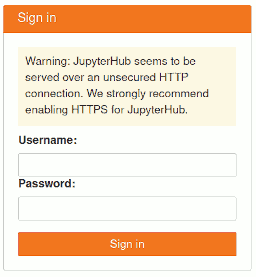

# <a id="3">3. Open the NanoGPT Notebook</a> 

On the compute node, that is in the browser, open what is called a Jupyter Notebook, or just _notebook_ for short

> `NanoGPT/nanoGPT.ipynb`

This file is just the source for the notebook you are currently viewing in PDF. Stop looking at the PDF, and move to section 3. in the notebook.

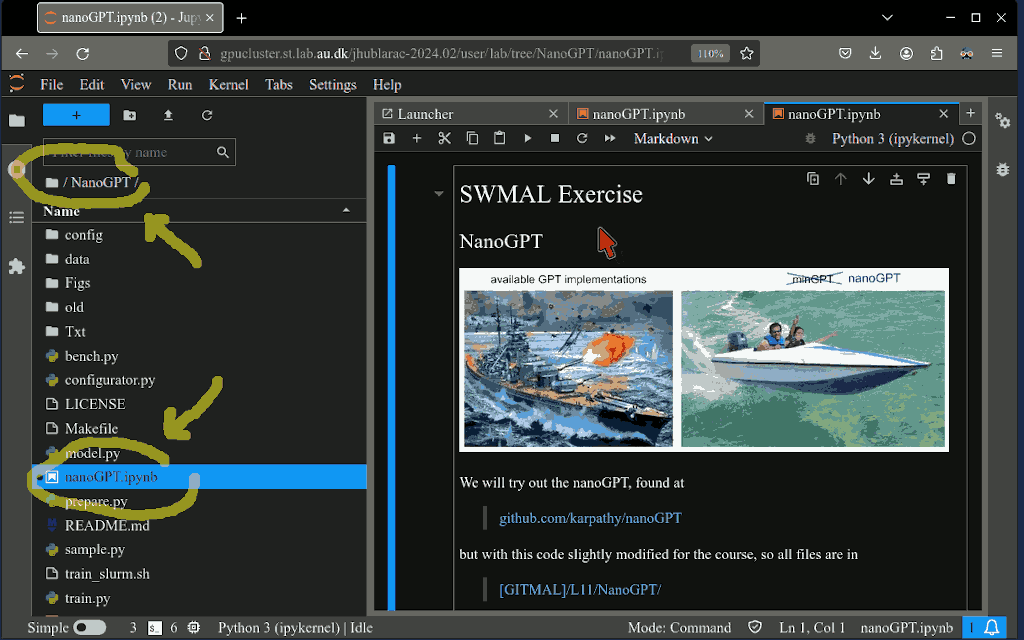

If you have not pulled lately, you probally also need to get the latest versions from GITMAL ala the `git pull` in the next cell..

In [ ]:
! test -d ~/GITMAL || git clone https://gitlab.au.dk/au204573/GITMAL.git
! cd ~/GITMAL && git pull

# <a id="4">4. Run a Python Command</a> 

In the just-opened notebook, try a Python command. Click in the cell below, then execute via 'Ctrl+Enter'

In [ ]:
print("I am Python!")

# <a id="5">5. Open a Shell Terminal</a> 

And this should print some stuff. Now we need to run everything in a shell (aka CLI or command-line-interface) but still use the Anaconda Notebook for this.

So, instead of a Jupyter Notebook, open a shell terminal, via the menu 'File | New | Terminal'

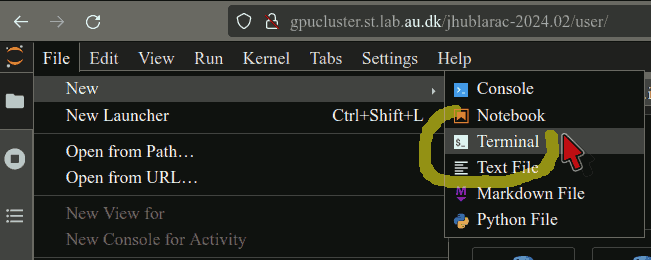

# <a id="6">6. Prepare Installation and DATASET</a> 

In the shell terminal, setup the Python ML framework by calling make ala
```
$> cd NanoGPT
$> make install
```
where I've already installed most stuff for your user. Then prepare the dataset as
```
$> make prepare
```
The dataset consists of [H.C. Andersen](https://en.wikipedia.org/wiki/Hans_Christian_Andersen)'s fairy tales. Take a peak into the beginning of the dataset, it is just a text file, with some fairy tails scraped from the internet

```
$> head data/hca/input.txt
```

which should print
```
Der kom en soldat marcherende hen ad landevejen: én, to!  én, to!  Han havde
sit tornyster på ryggen og en sabel ved siden, for han havde været i krigen,
og nu skulle han hjem.  Så mødte han en gammel heks på landevejen; hun var
så ækel, hendes underlæbe hang hende lige ned på brystet.  Hun sagde: "God
aften, soldat!  Hvor du har en pæn sabel og et stort tornyster, du er en
rigtig soldat!  Nu skal du få så mange penge, du vil eje!"
```

# <a id="7">7. Train</a> 

Now the dataset is ready for training. We train a tiny GPT model and only for a few epochs (iterations)

``` 
$> make train
```

This call should instantiate a GPT model with around 1.4 million parameters and begin the training part

```
>~/NanoGPT$ make train
/opt/anaconda-2024.02/bin/python3 train.py config/train_hca.py --max_iters=10 --warmup_iters=1 --eval_iters=1 --eval_interval=1
SELECTED device 'cuda:0' with free mem 10855 MiB out of total 2 GPUs
Overriding config with config/train_hca.py:
Overriding: max_iters = 10
Overriding: warmup_iters = 1
Overriding: eval_iters = 1
Overriding: eval_interval = 1
tokens per iteration will be: 16,384
found vocab_size = 100 (inside data/hca/meta.pkl)
Initializing a new model from scratch
number of parameters: 1.35M
num decayed parameter tensors: 14, with 1,395,456 parameters
num non-decayed parameter tensors: 7, with 1,344 parameters
using fused AdamW: True
compiling the model... (takes a ~minute)
step 0: train loss 4.5741, val loss 4.5712
iter 0: loss 4.5893, time 40976.51ms, mfu -100.00%
[..]
step 9: train loss 3.0594, val loss 3.1398
saving checkpoint to out-hca
step 10: train loss 3.0860, val loss 3.1229
saving checkpoint to out-hca
iter 10: loss 3.1182, time 140.29ms, mfu 0.37%
    
```

OK, for my training job a loss of 3.1, but without going into the detail of loss function $J$ here. 

# <a id="8">8. Predict</a>

Once trained, we can make some predictions, so try
   
``` 
$> make pred
```   

that will output some precitions to an input text sequence. This should look like garbage because we train too few iterations, ala

```
>~/NanoGPT$ make pred
/opt/anaconda-2024.02/bin/python3 sample.py --out_dir=out-hca --temperature=0.8 --num_samples=2 --start="Der kom en solda"
SELECTED device 'cuda:0' with free mem 10855 MiB out of total 2 GPUs
Overriding: out_dir = out-hca
Overriding: temperature = 0.8
Overriding: num_samples = 2
Overriding: start = Der kom en solda
number of parameters: 1.35M
Loading meta from data/hca/meta.pkl...
  start=Der kom en solda, temperature=0.8..
BEG 0 --------------------------------
Der kom en soldaoædljnnktpdkiQnimston onåt de;
rn nms ogPlagà., Gnld♣ltenså èr Ogeer d yfb­dlgicade h,fstd RLndeiOnSoginådrskngsåsenndlkldut L
MainesosaTuomsh ot h!nisviinn!ngSe Wdinger de s vjmt8vorsdt7 fen á2émvæ å, pkdtsndXæere Zrdé doyn g,r hprdrant ädknesgmvétóeermnifk, xgr2deg , dssbsgendsi5istsldkenaÆm mfsoY
manK*nen ignd3grWl-t trnon otedlnsHnsgeóud"ge be?n;alddjenn
sderrnlpo]drskdä nalderde din.lhasdvkohntanåfigeur Ddd0t ; óav,zdølknendtoderoP'må.
 èRen Kgnøu5glsesnhgWm ;er dskdeunkkhdkntena'nk ¹5uuBok
END 0 --------------------------------
[..]
```

# <a id="9">9. Longer Training</a>

Increase the number of training epochs, by opening the `Makefile` in the Notebook (look for the file in the left-hand pane, and click on it), and then change the line just under the `train:`
``` 
train:
    $(PYTHON) train.py config/train_$(DATASET).py \
        --max_iters=10   \
        --warmup_iters=1 \
        --eval_iters=1   \
        --eval_interval=1 
```
to say, 
``` 
train:
    $(PYTHON) train.py config/train_$(DATASET).py --max_iters=1000 
```
and remember to remove the `--warmup_iter`, `--eval_iter` and `--eval_interval`, since they are only needed when `max_iter` is below 250.

Then re-iterate doing a train-predict cycle
``` 
$> make train

[..]
iter 990: loss 1.7304, time 20.78ms, mfu 2.10%
step 1000: train loss 1.6311, val loss 1.8006
saving checkpoint to out-hca
iter 1000: loss 1.7507, time 4095.08ms, mfu 1.90%

```
The loss function now ends at 1.75. Make some new predictions

``` 
$> make pred

```

and the model now produces far better predictions at an H.C. Andersen text. For the _prompt_

```
--start="Der kom en solda"
```

the prediction asks for two examples, and the output will be similar to

```
$> make pred
/opt/anaconda-2024.02/bin/python3 sample.py --out_dir=out-hca --temperature=0.8 --num_samples=2 --start="Der kom en solda"
SELECTED device 'cuda:0' with free mem 10855 MiB out of total 2 GPUs
Overriding: out_dir = out-hca
Overriding: temperature = 0.8
Overriding: num_samples = 2
Overriding: start = Der kom en solda
number of parameters: 1.35M
Loading meta from data/hca/meta.pkl...
  start=Der kom en solda, temperature=0.8..
BEG 0 --------------------------------
Der kom en soldaten oppet
det vidstort af de har. Der lille på hønnem, og åber sagde den blev inden og stille
det af gik drigtigt vindet aft brødene, sagde skinne så svangernet, som
gen var fruet.
"Jeg hører jeg har mig den ikke!" sagde og han fapig skrækken som den er nifk, strækkelig som han sig
store sin forskrappen, og så den stod strømmen, den var et den forangalerligt
sammen på drække natter, og nu han var var skinner Det var var, den spurgte som måttede sig søen
lå så glasker, så som kunne så sid og hans
END 0 --------------------------------
[..]
```

# <a id="10">10. Tuning Parameters</a>

So, it worked. We inputted some HCA text via the file `data/hca/input.txt`, prepared the text for a GPT model, and trained and predicted.

But if you look closer at the predicted text, is not good HCA stuff, is it?

You could now start finetuning the GPT model by changing the temperature, the numbering of output samples and prompting via the parameters in the `Makefile`
```
--temperature=0.8 --num_samples=2 --start="Der kom en solda"
```
or increase its capacity with the parameters found in `config/train_hca.py`
```
n_layer = 3
n_head = 3
n_embd = 192
```

# <a id="11">11. Shakespeare instead of H.C. Andersen</a>

If you dislike the Danish example, switch to a Shakespeare dataset by modifying the header in the 
`Makefile` to
```
DATASET=shakespeare_char
#DATASET=hca
```
__NEWS__, Tuesday 8/10-2024:
> if you dislike old-style English Shakespearean output, try to run on newly 'scraped' text from DR.dk, by just replacing `DATASET=<whatever>` to 
>
> ```DATASET=dr```
>
>in the `Makefile`. I've just added fresh news from DR, as of today (and notice that the text is copyrighted).

Re-run the prepare/train/pred cycle, which will produce some nonsense Shakespearean text, but still with the right structure, ala

```
>~/NanoGPT$  make prepare
UNPACK   data/shakespeare_char/input.txt..
CREATING data/shakespeare_char/prepare.py..
RUNNING  data/shakespeare_char/prepare.py..
length of dataset in characters: 1,115,394
all the unique characters: 
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab size: 65
train has 1,003,854 tokens
val has 111,540 tokens
PREPARE: all ok!

>~/NanoGPT$ make train
/opt/anaconda-2024.02/bin/python3 train.py config/train_shakespeare_char.py --max_iters=1000 # --warmup_iters=1 --eval_iters=1 --eval_interval=1
SELECTED device 'cuda:0' with free mem 10855 MiB out of total 2 GPUs
Overriding config with config/train_shakespeare_char.py:
Overriding: max_iters = 1000
[..]
iter 980: loss 1.7262, time 30.01ms, mfu 1.76%
iter 990: loss 1.7039, time 29.97ms, mfu 1.76%
step 1000: train loss 1.5475, val loss 1.7367
saving checkpoint to out-shakespeare_char
iter 1000: loss 1.6678, time 4138.31ms, mfu 1.58%

>~/NanoGPT$ make pred
/opt/anaconda-2024.02/bin/python3 sample.py --out_dir=out-shakespeare_char --temperature=0.8 --num_samples=2 --start="ROMEO" 
SELECTED device 'cuda:0' with free mem 10855 MiB out of total 2 GPUs
Overriding: out_dir = out-shakespeare_char
Overriding: temperature = 0.8
Overriding: num_samples = 2
Overriding: start = ROMEO
number of parameters: 1.34M
Loading meta from data/shakespeare_char/meta.pkl...
  start=ROMEO, temperature=0.8..
BEG 0 --------------------------------
ROMEO:
Come, and will and is the servant;
Thou but take and my call and barnither us him to becterlack,
But conderates's a with our town or of it.

SICINIUS:
You, and is ensenge mild is the overs, and the never.

WARWICK:
No dise of the me nevery: the have all tyband make normore to the some.
Who my that morring to thee in the still still censed earth-of my heart
To known, rupt for the greath: there is expation
For her my of that be and to being
ard all his greath on the king and of your counto caren
END 0 --------------------------------

BEG 1 --------------------------------
ROMEO:
The nature, good of thou she me
That he seement many were throan them may in son, they body.

JULIET:
I'll stay case, my longs on my can stroes
Indeed me over the parse to our fareed; but is the hast.

FiRIAR LAURENCE:
What's should to lord.

BUCKINGHAM:
Why, bear that speak.

Second Servant:
How made stowll better in the senator,
Come in him the noth of Calture of the of time
The should eyest of appy and like.

KING RICHARD II:
Here king I say and that a make chook a counter for Glour comeo.

END 1 --------------------------------
```

## <a id="12">12. Training on Your Own Dataset</a>

Ok, the promise was to enable you to train on your dataset. Fortunately, this is easy with the text processing model of __GPT__, or just __GT__, for Generative Transformers, since our model is not __P__-re-trained.

Just create an input text file, and then this file can be used as a training set without any manual labelling, remembering that the answer to a text window of length 15 
```
Der kom en sold
```
using a HCA trained model is __'a'__ or effectively
```
 er kom en solda
```
that, in turn, can be the next input to the text model (recursiveness), so the model then answers __'t'__

```
  r kom en soldat
```
and so on, noticing the rolling text window, here of size 15. The input data also forms an automatic ground truth set, without further todo.

### Create Your Own Dataset and Train on It

Run the `makefile` in help mode and read some of the details regarding setting up your-own-data and follow steps 1) to 6)...

The `makefile` mentions the dataset name `mydataset` but you could rename this to anything you like, just replace `mydataset` everywhere.

```
$> make help

[..]
DATASETS:
  hca             : H.C. Andersens text
  dr              : DR news feed text
  shakespeare_char: shakespeare poems, char-mode
  openweb         : internet scraped data ala GPT-2, not possible
                    without more hardware, training time in weeks!
  your-own-data   : 1) create datadir, say 'mkdir ./data/mydat',
                    2) add input.txt and prepare.py in datadir
                       (copy prepare.py from this dir),
                    3) add config/train_mydataset.py
                       (just copy from train_hca.py),
                    4) modify dataset variable in the train file,
                       (edit the line: dataset = 'mydataset' 
                        in the config/train_mydataset.py file)
                    5) set DATASET=mydataset in Makefile,
                    6) run 'make prepare', 'make train' etc.
    [..]
  
```
enjoy<br>
.c

## For the SWMAL O3 Journal

### Qa Journaling the hands-on exercise

Write a journal on the topic! You are free to figure out an good way to document the Hands-on exercise in a journaling format. But remember an introduction and conclusion.

#### Relate the Hands-on exercise to ML concepts
For the journal, write an explanation of what you did, that is, explain the train-predict cycle, relating output from the nanoGPT to known concepts in ML, like iterations (`max_ites`), train- and val-loss (`train loss 4.8., val loss 4.8..`) optimizers (`AdamW`), etc.

(See a dump from a given train run in the section [Train the GPT model](#7))

Also, take a peek into a configuration files, and briefly explain elements, that seem to be familiar to _general_  ML concepts. 

Here is some text from the `config/train_hca.py` configuration, with a lot of elements that we can explain with respect to known ML concepts:

```
dataset = 'hca'

[..removed-some-stuff..]

gradient_accumulation_steps = 1
batch_size = 64
block_size = 256     # context of up to 256 previous characters

# tiny-winy baby GPT model :)
n_layer = 3
n_head  = 3
n_embd  = 192
dropout = 0.2

learning_rate = 1e-3 # with baby networks can afford to go a bit higher
max_iters     = 5000
lr_decay_iters= 5000 # make equal to max_iters usually
min_lr        = 1e-4 # learning_rate / 10 usually
beta2         = 0.99 # make a bit bigger because number of tokens per iter is small
warmup_iters  = 100  # not super necessary potentially
```

### Qb Explain some of the details of LLM training and prediction

What is `temperature`, what is the design matrix $\boldmatrix{X}$, where is the test data, $\boldmatrix{y}_\mbox{true}$, and what is prompting when talking about large language models? Try to explain some of these new concepts in the LLM lingo.

Did you create your own dataset? Do it, and document the results.

### [OPTIONAL] Qc

And, if you are brave, go into some of the technical issues related to large-language models (tokens, embeddings, recursive neural networks, etc.).

REVISIONS||
:-|:-
2024-04-12| CEF, initial.
2024-04-21| CEF, updated for GAI workshop.
2024-04-22| CEF, more modifications and elaborations.
2024-04-30| CEF, added a quick guide for the impatient.
2024-04-31| CEF, spell check and, too-fast proofreading.
2024-05-01| CEF, changed img to point to an external server.
2024-05-02| CEF, small text fixes.
2024-05-02| CEF, added Balder as compute node.
2024-09-11| CEF, modified for ATU Fordybelsesseminar.
2024-10-04| CEF, updated links and wifi names.
2024-10-08| CEF, final finetuning for ATU seminar.
2024-11-19| CEF, updated for SWMAL.
2025-01-28| CEF, update link to SWMAL BS.
2025-04-01| CEF, updated for SWMAL F25.